In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# setting project path
import os
import sys

gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE




import matplotlib.pyplot as plt
import seaborn as sns

# setting style
sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette(palette='Blues_r')

## Initial EDA and Light Data Cleaning

In [6]:
# creating path to data
path = os.path.join(gparent, 'data/raw', 'Terry_Stops.csv')
df = pd.read_csv(path)

In [7]:
# checking first few rows
df.head()

Subject Age Group  Subject ID     GO / SC Num  Terry Stop ID  \
0                 -          -1  20140000120677          92317   
1                 -          -1  20150000001463          28806   
2                 -          -1  20150000001516          29599   
3                 -          -1  20150000001670          32260   
4                 -          -1  20150000001739          33155   

  Stop Resolution Weapon Type Officer ID  Officer YOB Officer Gender  \
0          Arrest        None     7500           1984              M   
1   Field Contact        None     5670           1965              M   
2   Field Contact        None     4844           1961              M   
3   Field Contact        None     7539           1963              M   
4   Field Contact        None     6973           1977              M   

                Officer Race  ... Reported Time Initial Call Type  \
0  Black or African American  ...      11:32:00                 -   
1                      White  ...      07:59:00                 -   
2                      White  ...      19:12:00                 -   
3                      White  ...      04:55:00                 -   
4                      White  ...      00:41:00                 -   

  Final Call Type Call Type             Officer Squad Arrest Flag Frisk Flag  \
0               -         -  SOUTH PCT 1ST W - ROBERT           N          N   
1               -         -                       NaN           N          N   
2               -         -                       NaN           N          -   
3               -         -                       NaN           N          N   
4               -         -                       NaN           N          N   

  Precinct  Sector    Beat  
0    South  O       O2      
1        -       -       -  
2        -       -       -  
3        -       -       -  
4        -       -       -  

[5 rows x 23 columns]

In [8]:
#  checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47213 entries, 0 to 47212
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         47213 non-null  object
 1   Subject ID                47213 non-null  int64 
 2   GO / SC Num               47213 non-null  int64 
 3   Terry Stop ID             47213 non-null  int64 
 4   Stop Resolution           47213 non-null  object
 5   Weapon Type               47213 non-null  object
 6   Officer ID                47213 non-null  object
 7   Officer YOB               47213 non-null  int64 
 8   Officer Gender            47213 non-null  object
 9   Officer Race              47213 non-null  object
 10  Subject Perceived Race    47213 non-null  object
 11  Subject Perceived Gender  47213 non-null  object
 12  Reported Date             47213 non-null  object
 13  Reported Time             47213 non-null  object
 14  Initial Call Type     

In [9]:
# checking for nulls
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               604
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [10]:
# filling nulls and replacing - values
df['Officer Squad'].fillna('NA', inplace=True)
df.replace('-', 'NA', inplace=True)

In [11]:
#  checking work
df.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

In [12]:
#  checking uniques
df['Officer Race'].unique()

array(['Black or African American', 'White', 'Hispanic or Latino',
       'Asian', 'American Indian/Alaska Native', 'Two or More Races',
       'Not Specified', 'Nat Hawaiian/Oth Pac Islander', 'Unknown'],
      dtype=object)

In [13]:
# renaming categories for brevity
officer_race_list = ['Black or African American', 'White', 'Hispanic or Latino',
       'Asian', 'American Indian/Alaska Native', 'Two or More Races',
       'Not Specified', 'Nat Hawaiian/Oth Pac Islander', 'Unknown']

officer_replace_list = race_list = ['Black', 'White', 'Hispanic',
       'Asian', 'N_American', 'Multi-Racial',
       'NA', 'P_Islander', 'Unknown']

df['Officer Race'] = df['Officer Race'].replace(officer_race_list, officer_replace_list)

In [14]:
# checking uniques
df['Subject Perceived Race'].unique()

array(['Asian', 'NA', 'White', 'Black or African American', 'Other',
       'Unknown', 'American Indian or Alaska Native', 'Hispanic',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander'],
      dtype=object)

In [15]:
# renaming categories for brevity
race_list = ['Asian', 'NA', 'White', 'Black or African American', 'Other',
       'Unknown', 'American Indian or Alaska Native', 'Hispanic',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander']

replace_list =['Asian', 'NA', 'White', 'Black', 'Other',
       'Unknown', 'N_American', 'Hispanic',
       'Multi-Racial', 'P_Islander']

df['Subject Perceived Race'] = df['Subject Perceived Race'].replace(race_list, replace_list)

In [16]:
# checking uniques
df['Subject Perceived Gender'].unique()

array(['Male', 'NA', 'Female', 'Unable to Determine', 'Unknown',
       'Gender Diverse (gender non-conforming and/or transgender)'],
      dtype=object)

In [17]:
# renaming categories for brevity
gender_list = ['Male', 'NA', 'Female', 'Unable to Determine', 'Unknown',
       'Gender Diverse (gender non-conforming and/or transgender)']

gender_replace = ['Male', 'NA', 'Female', 'Undetermined', 'Unknown',
       'Gender Diverse']

df['Subject Perceived Gender'] = df['Subject Perceived Gender'].replace(gender_list, gender_replace)

In [18]:
# checking uniques
df['Officer Gender'].unique()

array(['M', 'F', 'N'], dtype=object)

## Visualizing Stop Outcomes

In [19]:
# checking proportion of arrests by race
df[df['Stop Resolution'] == 'Arrest']['Subject Perceived Race'].value_counts(normalize=True)

White           0.472444
Black           0.335305
Unknown         0.050913
Asian           0.037285
Hispanic        0.034628
N_American      0.033942
NA              0.016885
Multi-Racial    0.013885
Other           0.003428
P_Islander      0.001286
Name: Subject Perceived Race, dtype: float64

In [20]:
# making a list of the racial categories for visualization
races = df['Subject Perceived Race'].unique()

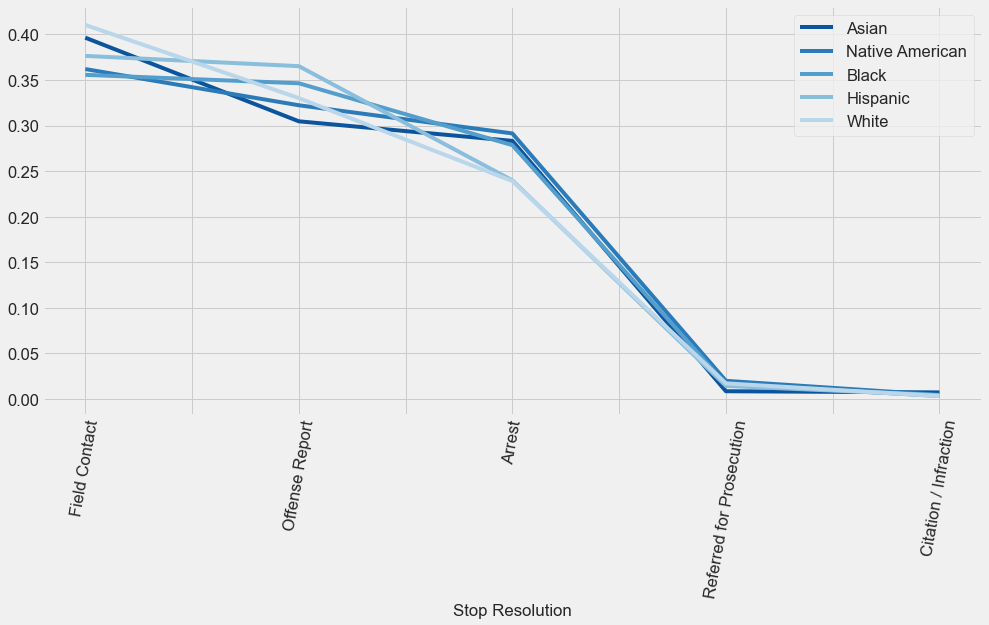

In [21]:
# visualizing outcomes by race
AA_Stops = df.groupby('Subject Perceived Race')['Stop Resolution']\
           .value_counts(normalize=True)['Asian']
AI_Stops = df.groupby('Subject Perceived Race')['Stop Resolution']\
           .value_counts(normalize=True)['N_American']
BAA_Stops = df.groupby('Subject Perceived Race')['Stop Resolution']\
           .value_counts(normalize=True)['Black']
H_Stops = df.groupby('Subject Perceived Race')['Stop Resolution']\
           .value_counts(normalize=True)['Hispanic']
W_Stops = df.groupby('Subject Perceived Race')['Stop Resolution']\
           .value_counts(normalize=True)['White']

fig, axes=plt.subplots(figsize=(15,7))

AA_Stops.plot(label='Asian')
AI_Stops.plot(label='Native American')
BAA_Stops.plot(label='Black')
H_Stops.plot(label='Hispanic')
W_Stops.plot(label='White')
plt.xticks(rotation=80)
plt.legend()
plt.show()

In [22]:
#  getting age list
ages = df['Subject Age Group'].unique()

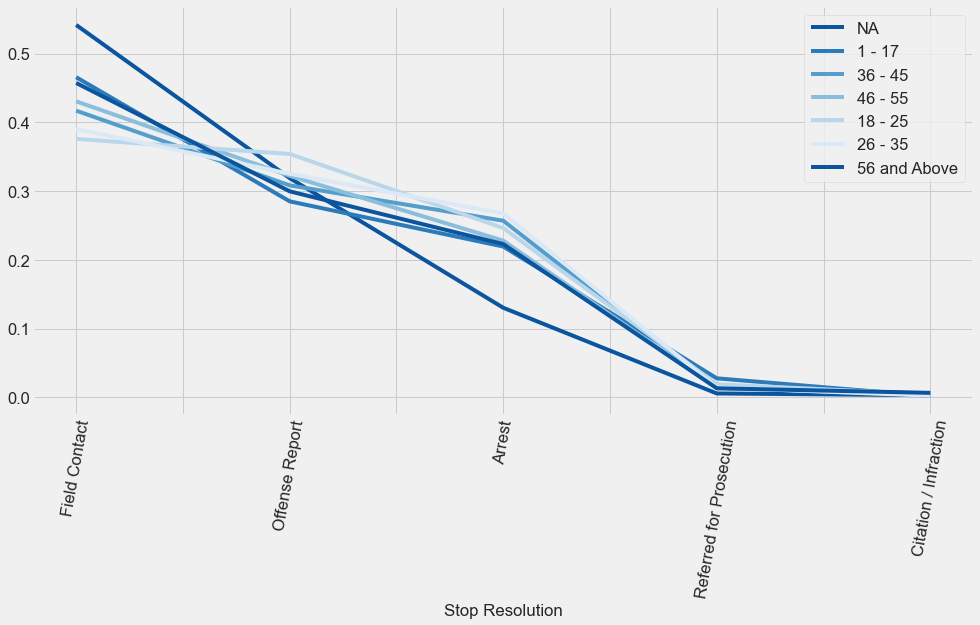

In [23]:
# checking outcomes by age category
fig, axes=plt.subplots(figsize=(15,7))

for age in ages:
    age_df = df.groupby('Subject Age Group')['Stop Resolution'].value_counts(normalize=True)[age]
    age_df.plot(label=f'{age}')
    
plt.xticks(rotation=80)
plt.legend()
plt.show()

In [24]:
# getting gender list
genders = df['Subject Perceived Gender'].unique()

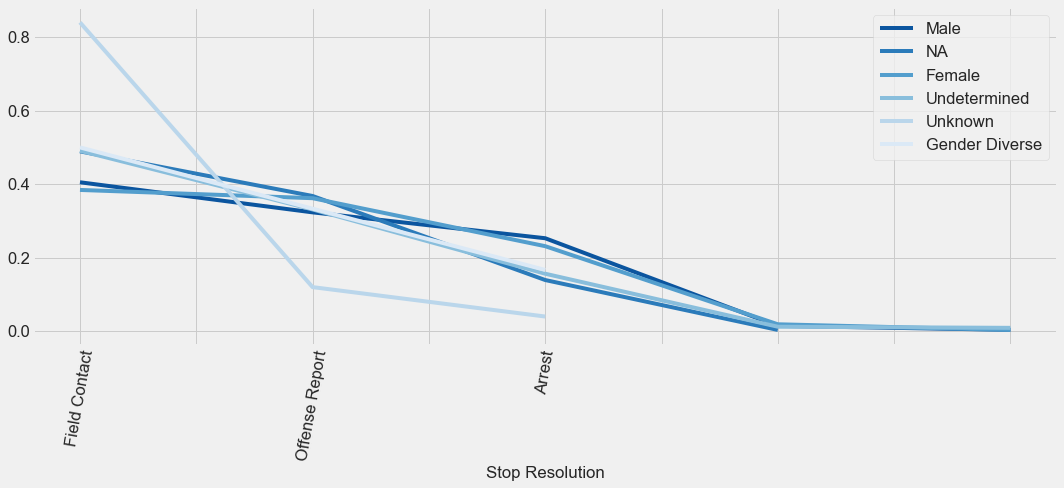

In [25]:
# checking outcome by gender
fig, axes=plt.subplots(figsize=(15,7))

for g in genders:
    age_df = df.groupby('Subject Perceived Gender')['Stop Resolution'].value_counts(normalize=True)[g]
    age_df.plot(label=f'{g}')
    
plt.xticks(rotation=80)
plt.legend()
plt.tight_layout()
plt.show()

## Data Cleaning

In [26]:
# creating and binarizing the target feature
df['Target'] = df['Stop Resolution']

df['Target'].unique()

df['Target'] = df['Target'].replace(['Arrest', 'Field Contact',
                                     'Citation / Infraction','Offense Report',
                                     'Referred for Prosecution' ], [1, 0, 0, 0, 0])

In [27]:
# moving target to the front of the data frame
column_name = 'Target'
first_column = df.pop(column_name)
df.insert(0, column_name, first_column)

In [28]:
# checking columns
df.columns

Index(['Target', 'Subject Age Group', 'Subject ID', 'GO / SC Num',
       'Terry Stop ID', 'Stop Resolution', 'Weapon Type', 'Officer ID',
       'Officer YOB', 'Officer Gender', 'Officer Race',
       'Subject Perceived Race', 'Subject Perceived Gender', 'Reported Date',
       'Reported Time', 'Initial Call Type', 'Final Call Type', 'Call Type',
       'Officer Squad', 'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector',
       'Beat'],
      dtype='object')

In [26]:
# dropping columns
df.drop(['Subject ID', 'Stop Resolution', 'GO / SC Num',
         'Terry Stop ID', 'Officer ID'], axis=1, inplace=True)

In [27]:
# checing work
df.head(2)

Target Subject Age Group Weapon Type  Officer YOB Officer Gender  \
0       1                NA        None         1984              M   
1       0                NA        None         1965              M   

  Officer Race Subject Perceived Race Subject Perceived Gender  \
0        Black                  Asian                     Male   
1        White                     NA                       NA   

         Reported Date Reported Time Initial Call Type Final Call Type  \
0  2015-10-16T00:00:00      11:32:00                NA              NA   
1  2015-03-19T00:00:00      07:59:00                NA              NA   

  Call Type             Officer Squad Arrest Flag Frisk Flag Precinct  Sector  \
0        NA  SOUTH PCT 1ST W - ROBERT           N          N    South  O        
1        NA                        NA           N          N       NA      NA   

     Beat  
0  O2      
1      NA

In [28]:
# check date and time columns
print(df['Reported Date'][:5])

df['Reported Time'][:5]

0    2015-10-16T00:00:00
1    2015-03-19T00:00:00
2    2015-03-21T00:00:00
3    2015-04-01T00:00:00
4    2015-04-03T00:00:00
Name: Reported Date, dtype: object


0    11:32:00
1    07:59:00
2    19:12:00
3    04:55:00
4    00:41:00
Name: Reported Time, dtype: object

In [29]:
# converting date & time columns to datetime types
df = df.astype({'Reported Time':'datetime64', 'Reported Date':'datetime64'})

In [30]:
#  getting year, month, day of month, day of week, and hour features
df['Reported Year'] = df['Reported Date'].dt.year

df['Reported Month'] = df['Reported Date'].dt.month

df['Day of Month'] = df['Reported Date'].dt.day

# Monday = 0, Sunday = 6
df['Day of Week'] = df['Reported Date'].dt.weekday

df['Reported Hour'] = df['Reported Time'].dt.hour

In [31]:
# checking work
df.sort_values(by='Reported Year').head(2)

Target Subject Age Group Weapon Type  Officer YOB Officer Gender  \
0           1                NA        None         1984              M   
39233       0           46 - 55        None         1973              M   

      Officer Race Subject Perceived Race Subject Perceived Gender  \
0            Black                  Asian                     Male   
39233        White                  White                     Male   

      Reported Date       Reported Time  ... Arrest Flag Frisk Flag Precinct  \
0        2015-10-16 2021-04-23 11:32:00  ...           N          N    South   
39233    2015-06-28 2021-04-23 05:03:00  ...           N          Y    North   

       Sector    Beat Reported Year Reported Month Day of Month Day of Week  \
0      O       O2              2015             10           16           4   
39233  B       B1              2015              6           28           6   

       Reported Hour  
0                 11  
39233              5  

[2 rows x 24 columns]

In [32]:
# dropping date and time columns
df.drop(['Reported Date', 'Reported Time'], axis=1, inplace=True)

In [33]:
# re-checking types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47213 entries, 0 to 47212
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Target                    47213 non-null  int64 
 1   Subject Age Group         47213 non-null  object
 2   Weapon Type               47213 non-null  object
 3   Officer YOB               47213 non-null  int64 
 4   Officer Gender            47213 non-null  object
 5   Officer Race              47213 non-null  object
 6   Subject Perceived Race    47213 non-null  object
 7   Subject Perceived Gender  47213 non-null  object
 8   Initial Call Type         47213 non-null  object
 9   Final Call Type           47213 non-null  object
 10  Call Type                 47213 non-null  object
 11  Officer Squad             47213 non-null  object
 12  Arrest Flag               47213 non-null  object
 13  Frisk Flag                47213 non-null  object
 14  Precinct              

In [34]:
# getting new column list
column_list = df.columns
column_list

Index(['Target', 'Subject Age Group', 'Weapon Type', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Initial Call Type', 'Final Call Type',
       'Call Type', 'Officer Squad', 'Arrest Flag', 'Frisk Flag', 'Precinct',
       'Sector', 'Beat', 'Reported Year', 'Reported Month', 'Day of Month',
       'Day of Week', 'Reported Hour'],
      dtype='object')

In [35]:
# creating list to check value counts
excluded = ['Officer YOB', 'Initial Call Type',
            'Final Call Type','Call Type', 'Officer Squad']
cols = [x for x in column_list if x not in excluded]

In [36]:
# printing value counts
for col in cols:
    print(f'{df[col].value_counts()}\n')

0    35546
1    11667
Name: Target, dtype: int64

26 - 35         15707
36 - 45         10017
18 - 25          9452
46 - 55          6111
56 and Above     2399
1 - 17           1978
NA               1549
Name: Subject Age Group, dtype: int64

None                                    32565
NA                                      11855
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument         633
Handgun                                   291
Firearm Other                             100
Blunt Object/Striking Implement            86
Club, Blackjack, Brass Knuckles            49
Firearm                                    38
Mace/Pepper Spray                          28
Other Firearm                              23
Firearm (unk type)                         15
Taser/Stun Gun                             10
Club                                        9
None/Not Applicable                         7
Rifle                                       7
Fire/Incendiary Devic

In [39]:
# fixing Southwest precinct
df['Precinct'] = df['Precinct'].replace('SouthWest', 'Southwest')

In [40]:
# checking proprtion of indeterminate race category
unknown = df['Subject Perceived Race'].value_counts()[2]
na = df['Subject Perceived Race'].value_counts()[3]

(unknown + na)/df['Subject Perceived Race'].value_counts().sum()

0.09571516319657722

In [41]:
# checking proportion of arrests to stops by race
df.groupby('Subject Perceived Race')['Target']\
           .value_counts(normalize=True)

Subject Perceived Race  Target
Asian                   0         0.716797
                        1         0.283203
Black                   0         0.721487
                        1         0.278513
Hispanic                0         0.760095
                        1         0.239905
Multi-Racial            0         0.799753
                        1         0.200247
NA                      0         0.895932
                        1         0.104068
N_American              0         0.708609
                        1         0.291391
Other                   0         0.736842
                        1         0.263158
P_Islander              0         0.732143
                        1         0.267857
Unknown                 0         0.773800
                        1         0.226200
White                   0         0.760888
                        1         0.239112
Name: Target, dtype: float64

## Visualizing the Target

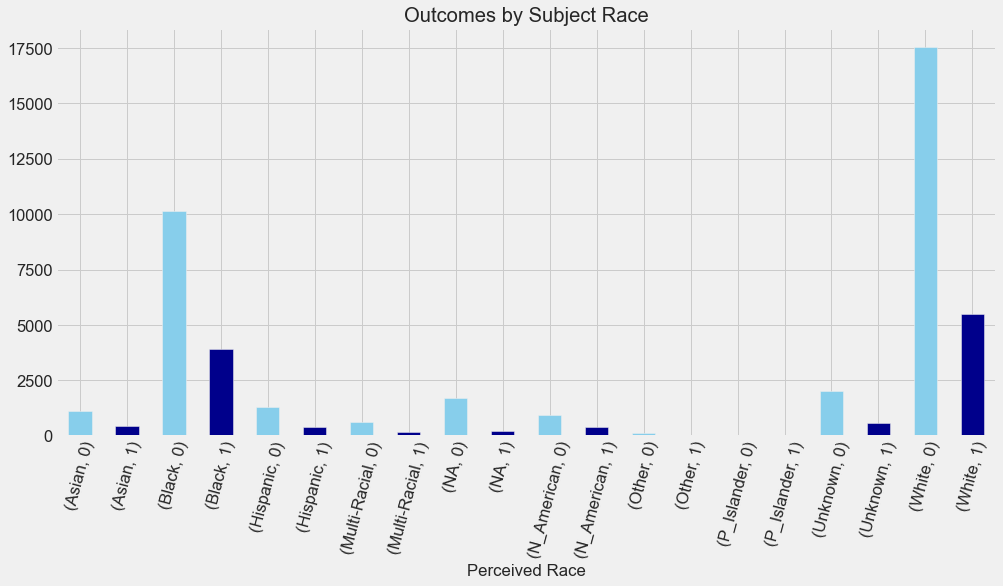

In [77]:
# getting normalized target value counts by race for visualization
target_race = df.groupby('Subject Perceived Race')['Target'].value_counts()

# visualizing target values by race
target_race.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Subject Race')
plt.xlabel('Perceived Race')
plt.xticks(rotation=75)
plt.show()

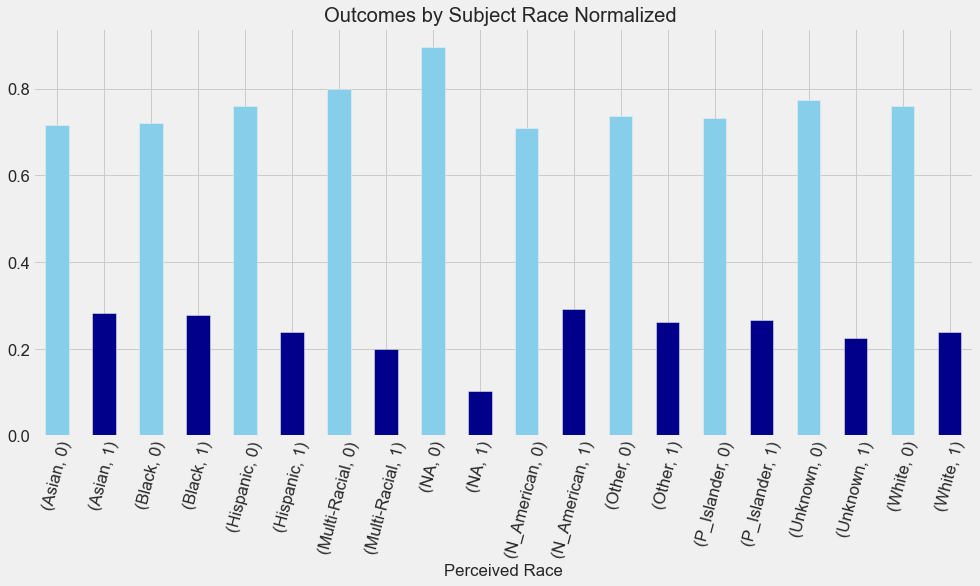

In [78]:
# getting target value counts by race for visualization
target_race = df.groupby('Subject Perceived Race')\
                        ['Target'].value_counts(normalize=True)

# visualizing target values by race
target_race.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Subject Race Normalized ')
plt.xlabel('Perceived Race')
plt.xticks(rotation=75)
plt.show()

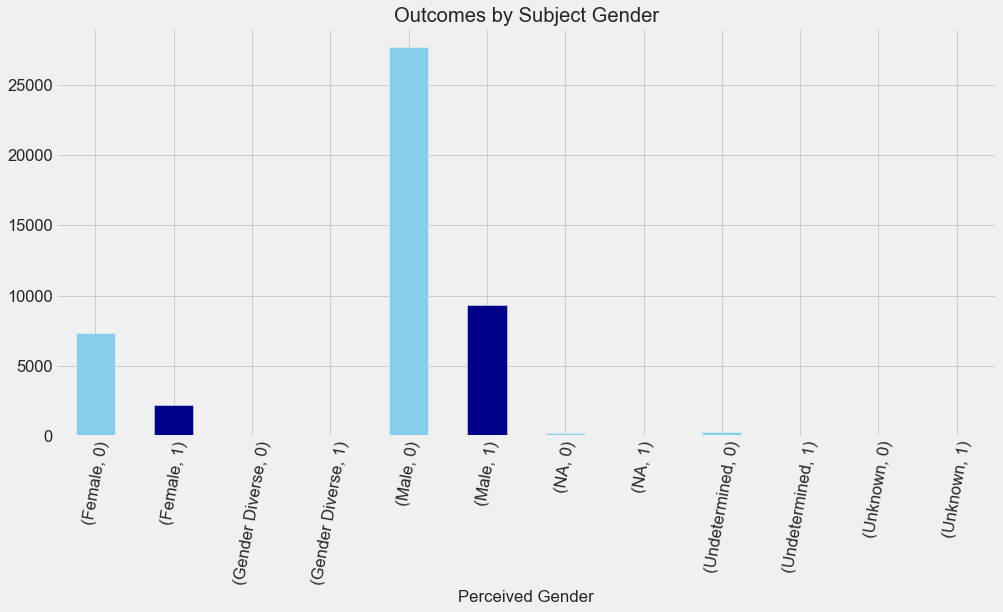

In [79]:
#  getting target value counts by gender
target_gender = df.groupby('Subject Perceived Gender')['Target'].value_counts()

# visualizing target values by gender
target_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Subject Gender')                                                 
plt.xlabel('Perceived Gender')
plt.xticks(rotation=80)
plt.show()

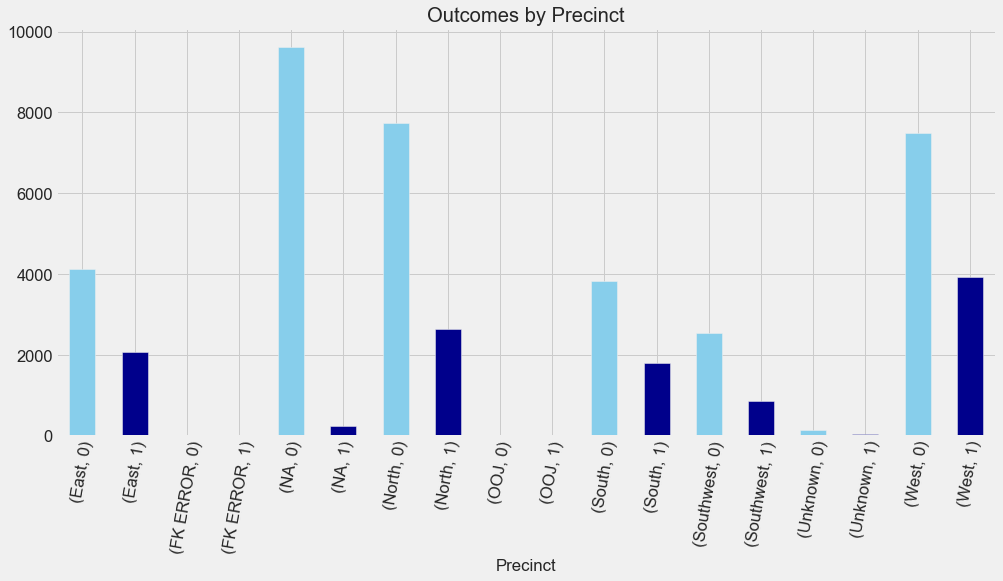

In [70]:
# getting target value counts by precinct
precinct_target = df.groupby('Precinct')['Target'].value_counts()

precinct_target.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Precinct')
plt.xlabel('Precinct')
plt.xticks(rotation=80)
plt.show()

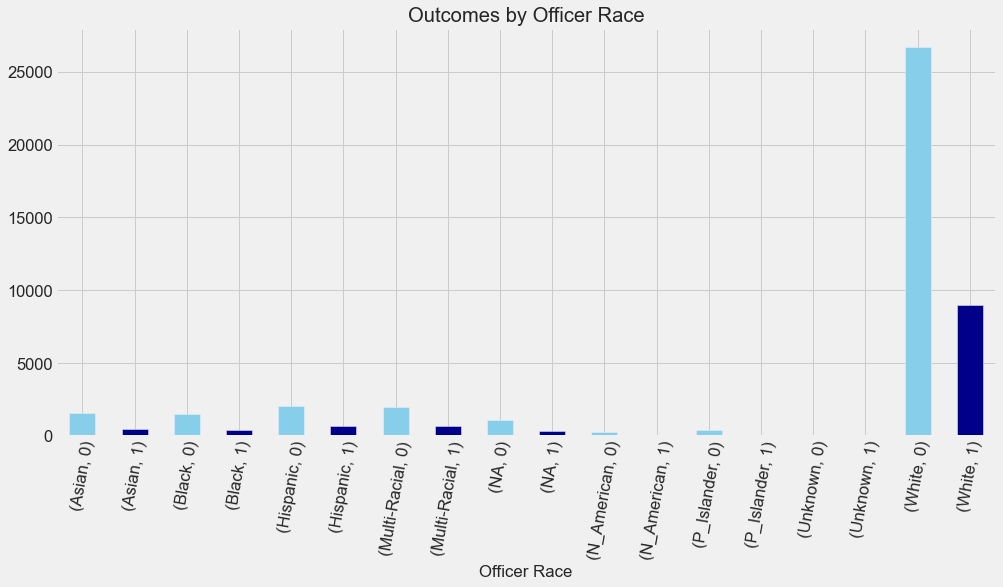

In [69]:
# getting target value counts by officer race
officer_races = df.groupby('Officer Race')['Target'].value_counts()

officer_races.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Officer Race')
plt.xlabel('Officer Race')
plt.xticks(rotation=80)
plt.show()

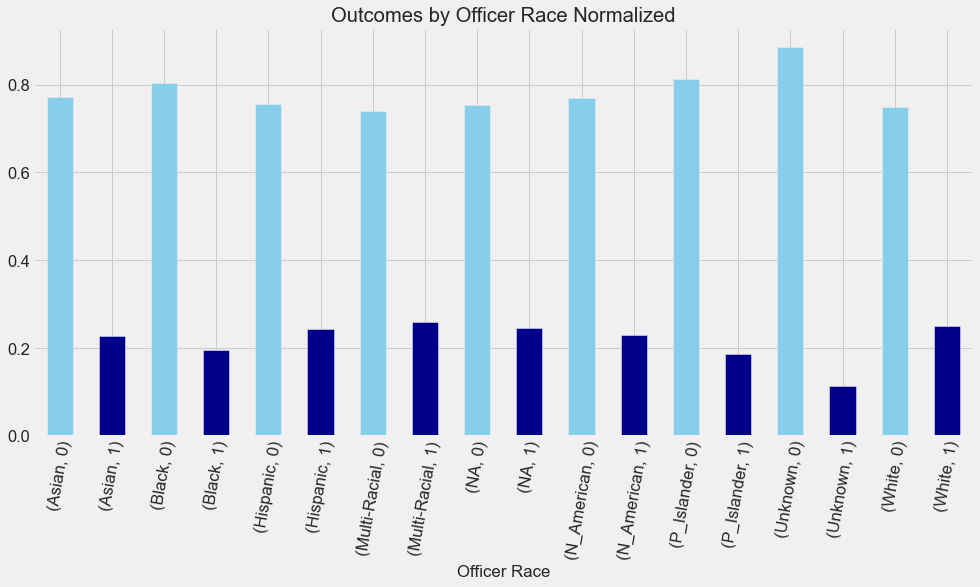

In [60]:
officer_races = df.groupby('Officer Race')['Target'].value_counts(normalize=True)

officer_races.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])

plt.title('Outcomes by Officer Race Normalized')
plt.xlabel('Officer Race')
plt.xticks(rotation=80)
plt.show()

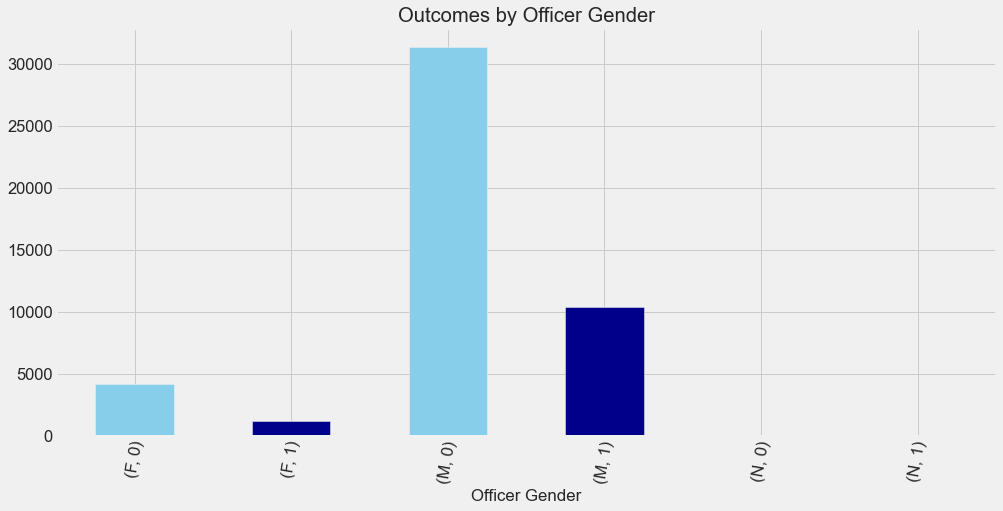

In [80]:
officer_gender = df.groupby('Officer Gender')['Target'].value_counts()

officer_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Officer Gender')
plt.xticks(rotation=80)
plt.xlabel('Officer Gender')
plt.show()

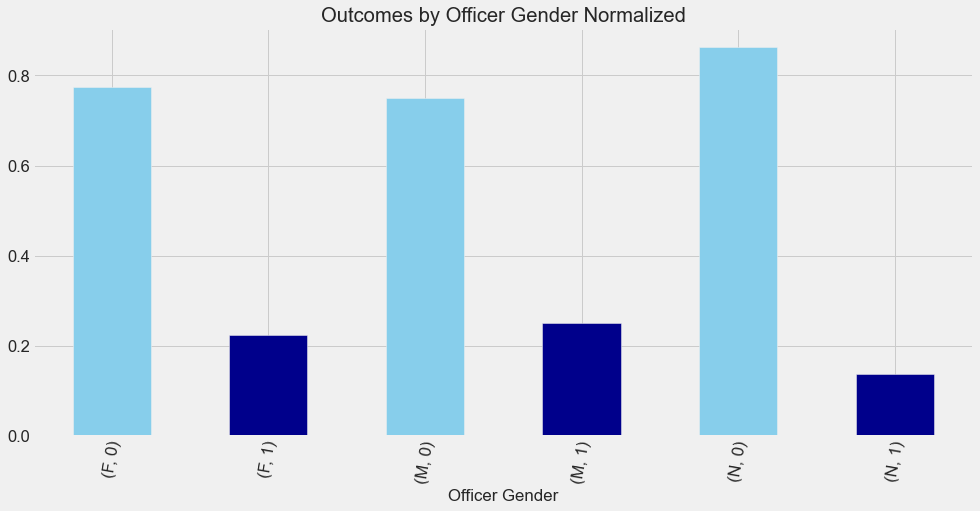

In [81]:
officer_gender = df.groupby('Officer Gender')['Target'].value_counts(normalize=True)

officer_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Officer Gender Normalized')
plt.xticks(rotation=80)
plt.xlabel('Officer Gender')
plt.show()